
The data I explored is the authors list in 8th edition Encyclopaedia. The data in original paper version is like:  
    
|  Initials   | Names  |
|  :----:  | :----:  |
| J.C—E.   | Cowie, James, Halkerton Mains. |
| E.C—X.  | Cox, Egbert, Author of “Sabbath Laws and Sabbath Duties.” |
| D.C. | Craigie, David, M.D., F.E.S.E., Author of “ Practice of Physic,”|
| J—N.C. | Crawfurd, John, F.E.S., F.E.G-.S., Author of “ A Descriptive Dictionary of the Indian Islands.”|
| E.S.D.  |  Dallas, Eneas S., Author of “ Poetics,  an Essay on Poetry.”|
| J.G.D.  |  Dalzell, Sir John Graham, Bart.|  
  
In XML files, each element contains one single word and the strings in one line are contained in a 'Textline' Section

In the data folder, it has several folders and each one represents one Encyclopaedia book. In these folders,  it contains some xml files and some jpg files, each of them represent one page in the book(i.e. each page in one Encyclopaedia book has one xml version and one image version)  

At first, I use os.walk() to iterate and output the path of all of the files and folders under the original folder.   

Then, i use the path to obtain the size of each folder(book) and the percentage of xml files and jpg files.

Then, i worked on reverting xml data of authors' list to the most structured type (dataframe). I defined some functions help me to identify whether the string in XML belongs to the initials of authors or the detailed introduction of authors. 



Necessary Import

In [1]:
import os
from os.path import getsize
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import xml.etree.cElementTree as ET
import re
import numpy as np
import seaborn as sns

This function is used to get the total size of each books in Encyclopedia, and the percentage of size of xmland jpg in each file.  

Using _os.walk()_ to obtain the path.  

The outputs are the total size of whole folder, total size of xml files and total size of jpg files in each folder.

(Because this path is the absolute path, it could only work on my own path)


In [2]:
def getdirsize(dir):
    size = 0
    root1 = '/Users/arthur/Desktop/My Documents/PG Design Informatice/Data Science for Design/ASS 2 & 3'
    a = '/'
    total=0
    total_xml = 0
    total_jpg = 0
    for root,dirs,files in os.walk(root1+'/'+dir):
        for name in files:
            d= [root,name]
            total = getsize(a.join(d))+total
            if '.xml' in a.join(d):
                total_xml = getsize(a.join(d))+total_xml
            if '.jpg' in a.join(d):
                total_jpg = getsize(a.join(d))+total_jpg
    return (total, total_xml, total_jpg)

This function is used to produce the dataframe of each file's size

The output should be the list of total size of each folder and the size of xml files, jpg files in every folder.

In [3]:
def eachFile(filepath):
    filesize=[]
    filesize_xml=[]
    filesize_jpg=[]
    child = []
    file_info = []
    pathDir = os.listdir(filepath)
    for allDir in pathDir:
        child.append(os.path.join('%s/%s'%(filepath,allDir)))
    
    for file in child:
        filesize.append(getdirsize(file)[0] / 1e6)
        filesize_xml.append(getdirsize(file)[1] / 1e6)
        filesize_jpg.append(getdirsize(file)[2] / 1e6)
                        
    data = {'Folder':pathDir,
            'Size(Mb)':filesize}
    file_df_total = pd.DataFrame(data)
    
    data_sep = {'Folder':pathDir,
            'Size(Mb)_xml':filesize_xml,
            'Size(Mb)_jpg':filesize_jpg}
    file_df_sep = pd.DataFrame(data_sep)
    return(file_df_total, file_df_sep)



These two functions are used to obtain the amount of xml files and jpg files in each folder

In [4]:
##########################################################################################
# This one is used to count the amount of .xml files and .jpg files in each folder
##########################################################################################    

def getdiramount(dir):
    size = 0
    root1 = '/Users/arthur/Desktop/My Documents/PG Design Informatice/Data Science for Design/ASS 2 & 3'
    a = '/'
    total_xml = 0
    total_jpg = 0
    for root,dirs,files in os.walk(root1+'/'+dir):
        for name in files:
            d= [root,name]
            if '.xml' in a.join(d):
                total_xml = total_xml +1
            if '.jpg' in a.join(d):
                total_jpg = total_jpg +1
    return (total_xml, total_jpg)

##########################################################################################
# This one is used to output the dataframe contained the amount of .xml files and .jpg files in each folder
##########################################################################################

def eachFileamount(filepath):
    fileamount_xml=[]
    fileamount_jpg=[]
    child = []
    file_info = []
    pathDir = os.listdir(filepath)
    for allDir in pathDir:
        child.append(os.path.join('%s/%s'%(filepath,allDir)))
    
    for file in child:
        fileamount_xml.append(getdiramount(file)[0])
        fileamount_jpg.append(getdiramount(file)[1])
                        
    data_sep = {'Folder':pathDir,
            'Amount_xml':fileamount_xml,
            'Amount_jpg':fileamount_jpg}
    fileamount_sep = pd.DataFrame(data_sep)
    return(fileamount_sep)

FileAmount = eachFileamount('nls-data-encyclopaediaBritannica')

In [5]:
FileAmount['Total'] = FileAmount['Amount_xml'] + FileAmount['Amount_jpg']
FileAmount_Total = sum(FileAmount['Total'])
FileAmount

Folder  Amount_xml  Amount_jpg  Total
0    190273291         895         894   1789
1    193819045        1067        1066   2133
2    192545785         421         420    841
3    192692190         445         444    889
4    192200901         857         856   1713
5    191679036         873         872   1745
6    193057497         895         894   1789
7    193057499         881         880   1761
8    193469393        1047        1046   2093
9    193819044         885         884   1769
10   192545784         453         452    905
11   192692191         441         440    881
12   192545783         447         446    893
13   190273290        1281        1280   2561
14   193819043         879         878   1757
15   193057498         953         952   1905
16   193469392         829         828   1657
17   192692756         841         840   1681
18   192200900         881         880   1761
19   149982181         873         872   1745
20   192146221         849         848   1697
21   193638940         873         872   1745
22   .DS_Store           0           0      0
23   192693395         881         880   1761
24   191253824         891         890   1781
25   144850375         869         868   1737
26   192015837         887         886   1773
27   191253823         855         854   1709
28   144133903         873         872   1745
29   192693199         903         902   1805
..         ...         ...         ...    ...
168  193108319         879         878   1757
169  193108326         877         876   1753
170  149979156         859         858   1717
171  190273289         875         874   1749
172  191689062         871         870   1741
173  191689065         885         884   1769
174  192984258         943         942   1885
175  193696082         845         844   1689
176  193696085        1067        1066   2133
177  192984260        1015        1014   2029
178  191678902         429         428    857
179  192984256         845         844   1689
180  193109113         849         848   1697
181  193109114         875         874   1749
182  191679020         425         424    849
183  149981189         883         882   1765
184  191689064         861         860   1721
185  191689063         895         894   1789
186  193916150         833         832   1665
187  191809866         419         418    837
188  193109115         855         854   1709
189  191679021        1073        1072   2145
190  191679019         433         432    865
191  191678903         439         438    877
192  192984257         857         856   1713
193  193109112         871         870   1741
194  193696084         941         940   1881
195  149978642         843         842   1685
196  192984259         975         974   1949
197  193696083         939         938   1877

[198 rows x 4 columns]

In [6]:
print('There are ', FileAmount_Total, "files in 'nls-data-encyclopaediaBritannica' folder.")

There are  310971 files in 'nls-data-encyclopaediaBritannica' folder.


This is the list of each folder's size and the barchart of them

        Folder    Size(Mb)
0    190273291  269.680983
1    193819045  368.074403
2    192545785  127.642794
3    192692190  131.094803
4    192200901  262.752930
5    191679036  274.320642
6    193057497  271.015246
7    193057499  245.145396
8    193469393  329.010107
9    193819044  278.520547
10   192545784  123.871247
11   192692191  127.357461
12   192545783  120.683286
13   190273290  411.700736
14   193819043  277.816057
15   193057498  248.778092
16   193469392  285.525752
17   192692756  266.485199
18   192200900  249.357641
19   149982181  275.797921
20   192146221  242.101045
21   193638940  291.433877
22   .DS_Store    0.000000
23   192693395  248.009798
24   191253824  274.247592
25   144850375  280.805713
26   192015837  277.016466
27   191253823  250.263749
28   144133903  261.019488
29   192693199  280.997028
..         ...         ...
168  193108319  247.634572
169  193108326  296.000763
170  149979156  269.755017
171  190273289  291.779833
172  191689062  268.880178
1

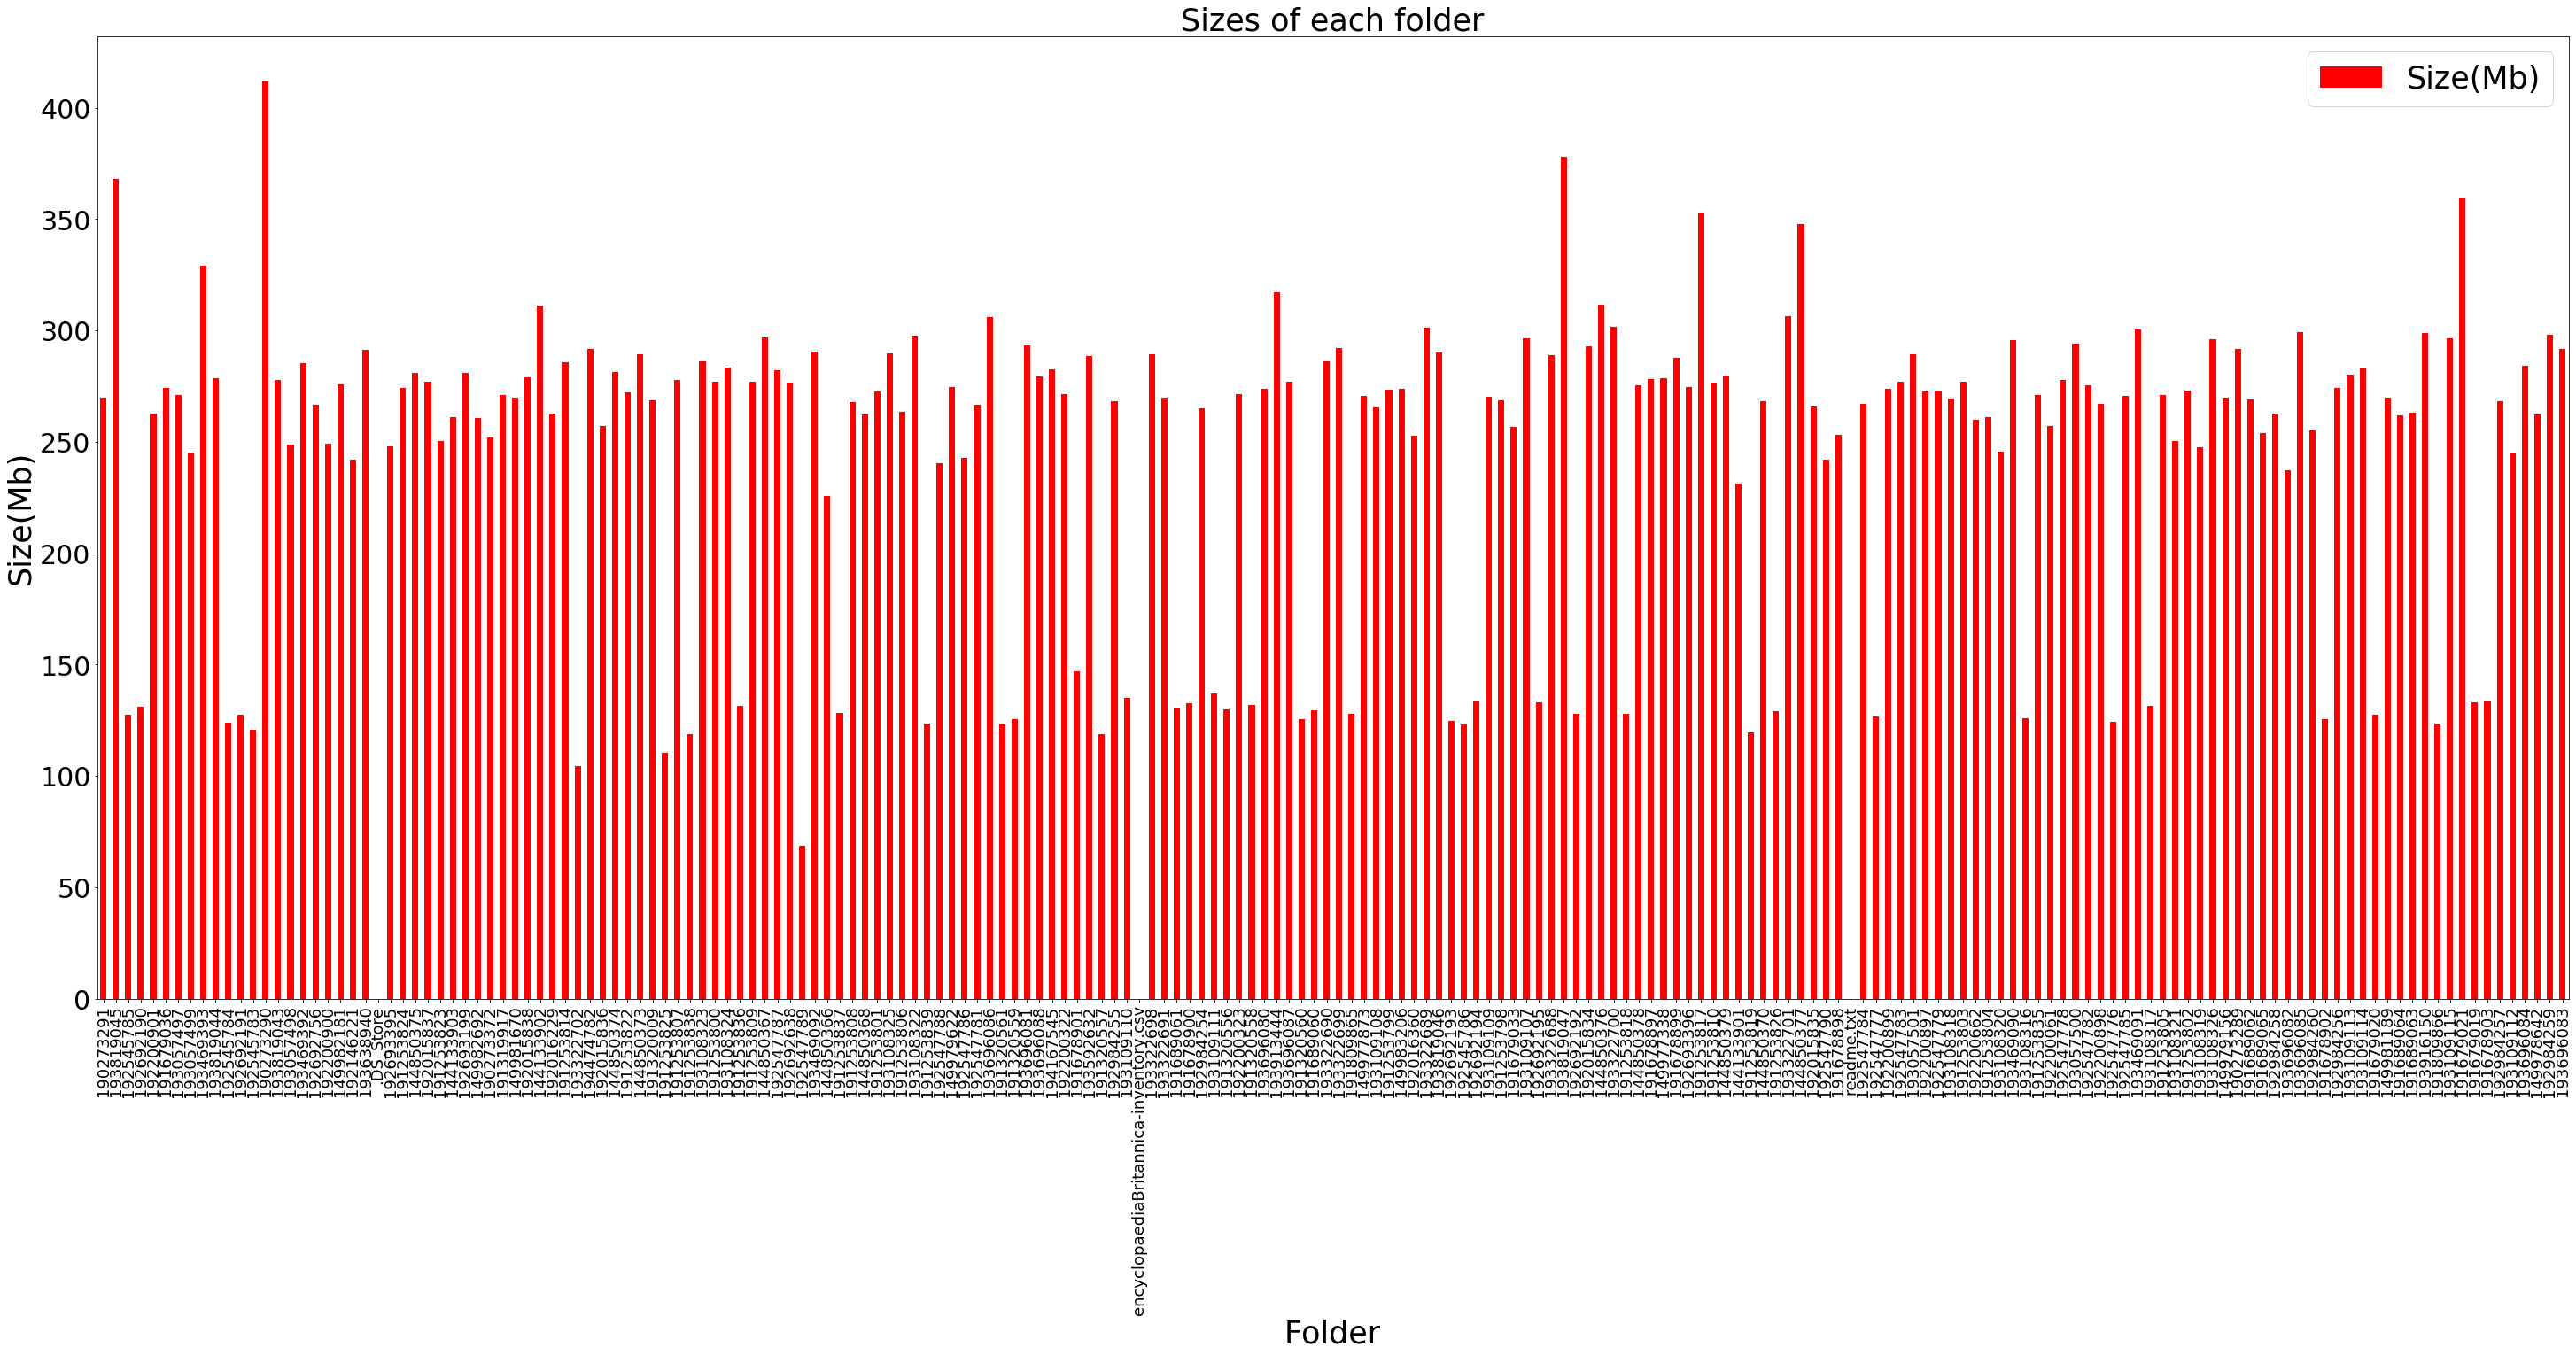

In [7]:
file_info_total = eachFile('nls-data-encyclopaediaBritannica')[0]
file_info_total.plot.bar(x = 'Folder', y = 'Size(Mb)', color = 'red', figsize = (50, 20));
print(file_info_total)
plt.title('Sizes of each folder',fontsize = 35)
plt.xlabel ('Folder', fontsize = 35)
plt.xticks(fontsize = 18)
plt.ylabel('Size(Mb)', fontsize = 35)
plt.yticks(fontsize = 30)
plt.legend(fontsize = 35)


This graph illustrates the percentage of .XML files and .JPG files in each folder and the barchart based on the last graph

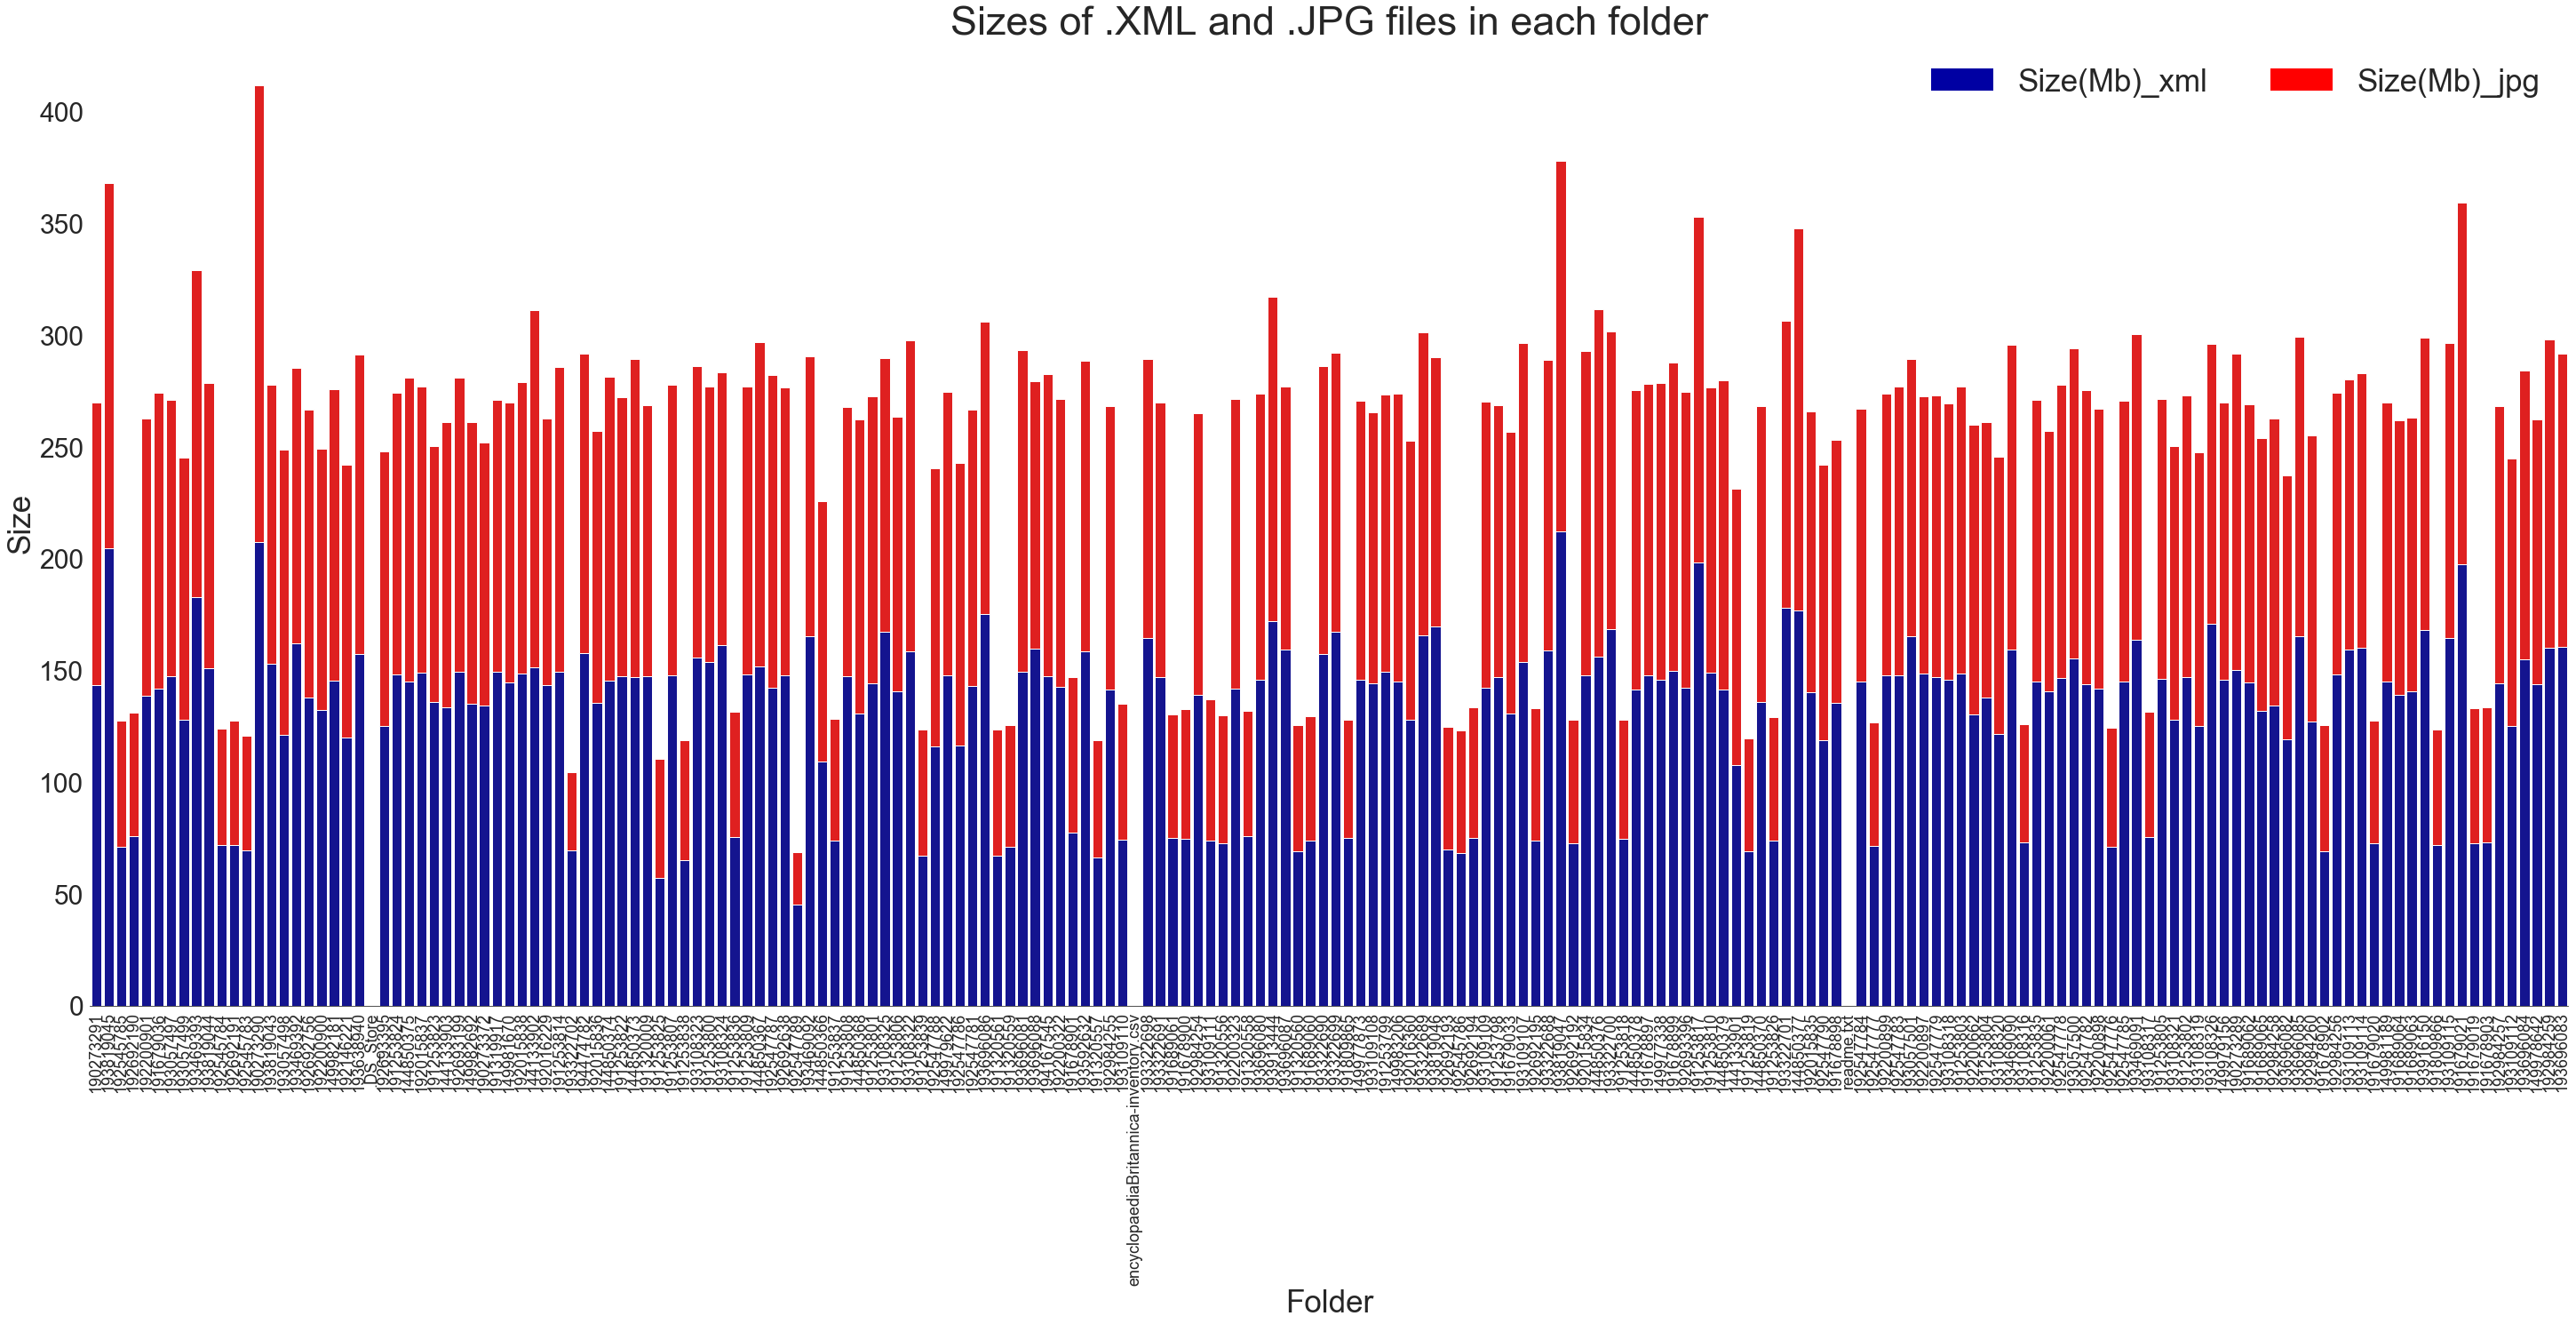

In [8]:
file_info_sep = eachFile('nls-data-encyclopaediaBritannica')[1]
file_info_sep['Total'] = file_info_sep['Size(Mb)_xml']  +file_info_sep['Size(Mb)_jpg']
 
sns.set_style("white")
sns.set_context({"figure.figsize": (50, 20)})

sns.barplot(x = file_info_sep['Folder'], y = file_info_sep['Total'], color = "red")
 
bottom_plot = sns.barplot(x = file_info_sep['Folder'], y = file_info_sep['Size(Mb)_xml'], color = "#0000A3")
 
topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Size(Mb)_xml', 'Size(Mb)_jpg'], loc=1, ncol = 2, prop={'size':35})
l.draw_frame(False)
 
sns.despine(left=True)
bottom_plot.set_ylabel("Size",fontsize = 35)
bottom_plot.set_xlabel("Folder",fontsize = 35)
bottom_plot.set_xticklabels(file_info_sep['Folder'], rotation=90, fontsize=18)
plt.yticks(fontsize = 30)
plt.title('Sizes of .XML and .JPG files in each folder',fontsize = 45)
plt.show()

In [9]:
AuthorsPage = ('02','15','28','41','54','67','80','93')
param = (10,55,38,38,38,38,38,38)
List_of_Authors = pd.DataFrame(columns = ['Initial','Authors']) 

This Function aims to identify whether the string is the initials of authors and output the list of initials

In [10]:
def isinitials(tags):
    Initials = []
    counter = 0
    pattern='^[A-Z\S][^A-z0-9]'
    for elem in tree.iter(tag=tags):
        if elem.attrib['CONTENT'] == 'Initials.' :
            counter = counter + 1
        if elem.attrib['CONTENT'] == 'Names.':
            counter = 0
        if counter >= 1:
            counter = counter + 1
            if (elem.attrib['CONTENT'] != 'Initials.') :
                if (re.match(pattern,elem.attrib['CONTENT']) != None):
                    Initials.append(elem.attrib['CONTENT'])
    return Initials

***  
This Function aims to identify whether the string is the first line. Because some introduction of authors have more than 1 line, I need to connect the string which is not in the first line to the first one and let them be a whole item.  

 I used attribute 'HPOS' as parameter to identify whether the line has right indent compared with the last line.  
 
For example,   

Xxxxxxx     (First line)  

&emsp; xxxxxxx   (Second line)

In [11]:
def isfirstline(string,y):
    firstline = 0
    counter = 0
    a = 0
    pattern='^[A-z][\w\S]'
    for textline in tree.iter('{http://www.loc.gov/standards/alto/v3/alto.xsd}TextLine'):
        counter_elem = 0
        for elem in textline.iter(r'{http://www.loc.gov/standards/alto/v3/alto.xsd}String'):
            if re.match(pattern,elem.attrib['CONTENT']) != None:
                counter_elem = counter_elem + 1
                if elem.attrib['CONTENT'] == 'Names.' :
                     counter = 0
                     counter = counter+ 1
                if elem.attrib['CONTENT'] == 'Initials.':
                     counter = 0
                if ((counter >= 1) & (elem.attrib['CONTENT'] != 'Names.')):
                    counter = counter + 1
                    if (counter == 2) :
                        a = elem.attrib['HPOS']
                if counter_elem == 1:
                    # If the HPOS of one line has a large difference with last line's "HPOS" value, it should be the first line.
                    if ((int(elem.attrib['HPOS']) <= int(a)+y) & (int(elem.attrib['HPOS']) >= int(a)-y)):
                        if (elem.attrib['CONTENT'] in string) :
                            firstline = 1
    return firstline
                    

In [12]:
for x,y in zip(AuthorsPage,param):
    file_path = '/Users/arthur/Desktop/My Documents/PG Design Informatice/Data Science for Design/ASS 2 & 3/List of Authors/193322702/alto/1934454'+x+'.34.xml'
    tree = ET.ElementTree(file=file_path)
    initials = isinitials('{http://www.loc.gov/standards/alto/v3/alto.xsd}String')
    names = []
    counter = 0
#####################################################################################
#  Combining every words in one line into one String
#  The original string is more likely a list with ['Cowie' , ',' , 'James' , ',' , 'Halkerton Mains.'] and after 
# combination it will be ['Cowie, James, Halkerton Mains.']
    for textline in tree.iter('{http://www.loc.gov/standards/alto/v3/alto.xsd}TextLine'):
        a = ''
        for elem in textline.iter(r'{http://www.loc.gov/standards/alto/v3/alto.xsd}String'):
            a =a+' '+str(elem.attrib['CONTENT']) 
        if a == ' Names.' :
            counter = counter + 1
        if a == ' Initials.':
            counter = 0
        if counter >= 1:
            counter = counter + 1
            if (a != ' Names.') :
                 names.append(a)
                    
#####################################################################################
# Clean space before each string
    pattern_clean = '^\s'
    names1=[]
    for i in range(0,len(names)):
        clean=re.match(pattern_clean,names[i])
        if clean != None:
            names1.append(names[i].lstrip())

#####################################################################################
# Clean hyphen(xx'-'xx) and connect the two strings together
    list_of_content_1 = []
    counter = 0
    # Matching the  ' - ' at the end of the string  
    pattern='.+(-)$'
    for i in range(0,len(names1)):
        m=re.match(pattern,names1[i])
        if m!=None:
            if counter == 1:
                # Deal with the situation which contains more than one hyphen in the context
                # For example:
                #   'xxxxxxxxxxxxxxxx'
                #   'xxxxxxxxxxxxx-'
                #   'xxxxxxxxxxxxxxxx-'
                 list_of_content_1[-1] = list_of_content_1[-1].replace('-','')
                 list_of_content_1[-1] = list_of_content_1[-1] + names1[i+1]
            if counter == 0:
                # Deal with The Normal situation :
                #    ' xxxxxxxxxxxxxxxx'
                #    ' xxxxxxxxxxxxxxx-'
                #    ' xxxxxxxxxxxxxxxx'
                names1[i] = names1[i].replace('-','')
                combine = names1[i] + names1[i+1]
                counter = 1 
                list_of_content_1.append(combine)
        else:
            if counter == 0:
                list_of_content_1.append(names1[i])
            if counter == 1:
                counter = 0

#####################################################################################
# Identify whether the string is the first line and connect all string after the first line
    content = []
    a = ''
    pattern='^[A-z][A-z\S]'
    for i in range(0,len(list_of_content_1)):
        if re.match(pattern,list_of_content_1[i]) != None:
            if isfirstline(list_of_content_1[i],y) == 1:
                content.append(list_of_content_1[i])
            if isfirstline(list_of_content_1[i],y)==0:
                content[-1] = content[-1] + ' '+ list_of_content_1[i]
                
    AuthorsList = pd.DataFrame({'Initial':initials, 'Authors':content})
    List_of_Authors = pd.concat([List_of_Authors,AuthorsList],axis=0,join='inner')
    List_of_Authors.reset_index(drop=True, inplace=True)



In [13]:
List_of_Authors

Initial                                            Authors
0    W.H.D.A.                                    Adams, W. H. D.
1        T.A.                               Aitken, Thomas, M.D.
2        W.A.  Alexander, William, Mining Engineer, and one o...
3      W.L.A.  Alexander, W. Lindsay, D.D., Author of “ The C...
4      W.P.A.  Alison, William P., M.D., late Professor of Pr...
5    T.A—L—N.                            Allan, Thomas, E.E.S.E.
6      J.A—N.       Allen, John, late Master of Dulwich College.
7      A.A—N.  Anderson, Adam, LL.D., late Professor of Natur...
8      T.A—N.  Anderson, Thomas, M.D., Professor of Chemistry...
9        C.A.  Apperley, Charles, Author of 11 Treatise on th...
10     T.C.A.  Archer, Thomas Croxen, Author of Eegius Keeper...
11       F.A.                                 Arnold, Frederick.
12       A.A.                           Ashpitel, Arthur, F.S.A.
13       J.A.                        Aylen, Jonathan, Greenwich.
14     W.E.A.  Aytoun, William E., D.C.L., Professor of Eheto...
15     C.C.B.                       Babington, C. C., Cambridge.
16     W.B—T.  Bagehot, Walter, Author of “ Estimates of some...
17   J.H.B—E.  Balfour, John Hutton, M.D., Professor of Botan...
18       J.B.  Ballantyne, James, Author of “ The Gaberlunzie...
19     D.B—E.                                 Bannatyne, Dugald.
20     J.B—W.                            Barrow, Sir John, Bart.
21    J—NB—W.                Barrow, John, F.E.S., F.E.G.S., &c.
22       C.B.               Bathurst, Hon. and Eev. Chas., LL.D.
23     T.B—Y.                               Bazley, Thomas, M.P.
24   J.H.B—T.  Bennett, John Hughes, M.D., F.E.S.E., Professo...
25   H.J.B—P.                   Bishop, Henry J , St Petersburg.
26       A.B.                                       Black, Adam.
27     C.B.B.                Black, Charles B., Santiago, Chile.
28     J.S.B.  Blackie, John Stuart, Professor of Greek in th...
29     W.B—R.  Blair, William, late Member of the Supreme Cou...
..        ...                                                ...
312    T.T—N.                              Thomson, Rev. Thomas.
313      W.T.  Thomson, William, LL.D., Professor of Natural ...
314    W.T—Y.  Thornbury. Walter, Author of “ Monarchs of the...
315      E.T.  Thornton, Edward, Author of ‘‘ Gazetteer of In...
316    J.T—D.  Tilleard, John, one of Her Majesty’s Inspector...
317      C.T.  Tomlinson, Charles, Lecturer on Natutal Scienc...
318    T.S.T.  Traill, Thomas Stewart, M.D., Professor of Med...
319   T.S.T—L                             Traill, Thomas Stuart,
320    T.T—D.                             Tredgold, Thomas, C.E.
321    J.T—H.  Tulloch, John, D.D., Principal of St Mary’s Co...
322    P.F.T.                Tytler, Patrick Fraser, Author of a
323      J.V.  Veitch, John, M.A., Professor of Logic, &c., S...
324      W.W.  Wallace, William, LL.D., late Professor of Mat...
325    J.W—E.                                Wallace, Rev. John.
326    J.W—K.                                     Warrack, John.
327    R.W—N.                      Waterston, Rev. Richard, B.A.
328      D.W.  Welsh, David, D.D., late Professor of Church H...
329    W.W—H.  Westgarth, William, Author of “ The Gold Field...
330    R.W—T.  Westmacott, Richard, Professor of Sculpture, R...
331    W.J.W.                                      Whitty, W. J.
332    A.W—K.                                Whytock, Alexander.
333    G.B.W.                 Wilding, Rev. G. B., A.M., Oxford.
334    D.W—N.  Wilson, Daniel, LL.D., Professor of History an...
335      G.W.  Wilson, George, M.D., late Professor of Techno...
336      J.W.  Wilson, James, F.R.S.E., Author of Scotland,” &c.
337    J.W—N.                  Wilson, John (of Edington Mains).
338    S.P.W.                  Woodward, S. P. (British Museum.)
339    J.W—Y.  Woolley, Rev. Joseph, LL.D., one of H.M. Inspe...
340      J.Y.                       Young, John, The Honourable.
341      T.Y.  Young, Thomas, M.D., Autho

Match all authors who are from university and count the amount of each university.  

The table is the distribution of authors where authors come from.

In [14]:
university = []
professor = []
counter = 0
for initial, authors in zip(List_of_Authors['Initial'],List_of_Authors['Authors']):
    result = re.findall(r".*University of(.*)", authors)
    result_1 = re.findall(r".+\, (.*?)University", authors)
    result_2 = re.findall(r".*University(.*)", authors)
    if result != []:
        # if the name of university is "University of xxx", grab them
        for item in result:
            university.append('University of'+' '+str(item))
            professor.append(str(initial))
            #print(initial, authors)
    else:
        if result_1 != []:
            # if the name of university name is "xxx University", grab them
            for item_1 in result_1:
                if item_1 !='':
                    university.append(str(item_1)+' '+'University')
                    professor.append(str(initial))
                    #print(initial, authors)
                else:
                    for item_2 in result_2:
                        # if the name of university name is "University xxx", grab them
                        university.append('University' + ' '+ str(item_2))
                        professor.append(str(initial))
                        #print(initial, authors)
pro_uni = pd.DataFrame({'Initials':professor,'University':university})

distribution_univ = pro_uni['University'].value_counts()
dict_univ = {'University':distribution_univ.index,'Amount':distribution_univ.values}
a = distribution_univ.values
distribution_univ = pd.DataFrame(dict_univ)
distribution_univ

University  Amount
0                          University of  Edinburgh.      20
1                            University of  Glasgow.       6
2                         University of  St Andrews.       1
3                              Edinburgh  University       1
4                      University  College, Toronto.       1
5                       University  College, London.       1
6  University of  Cambridge, and Rector of Eversley,       1
7  University of  Louisiana, U.S., and Superinten...       1

This is the list of distribution of which university authors come from.
***

Text(0, 0.5, 'University')

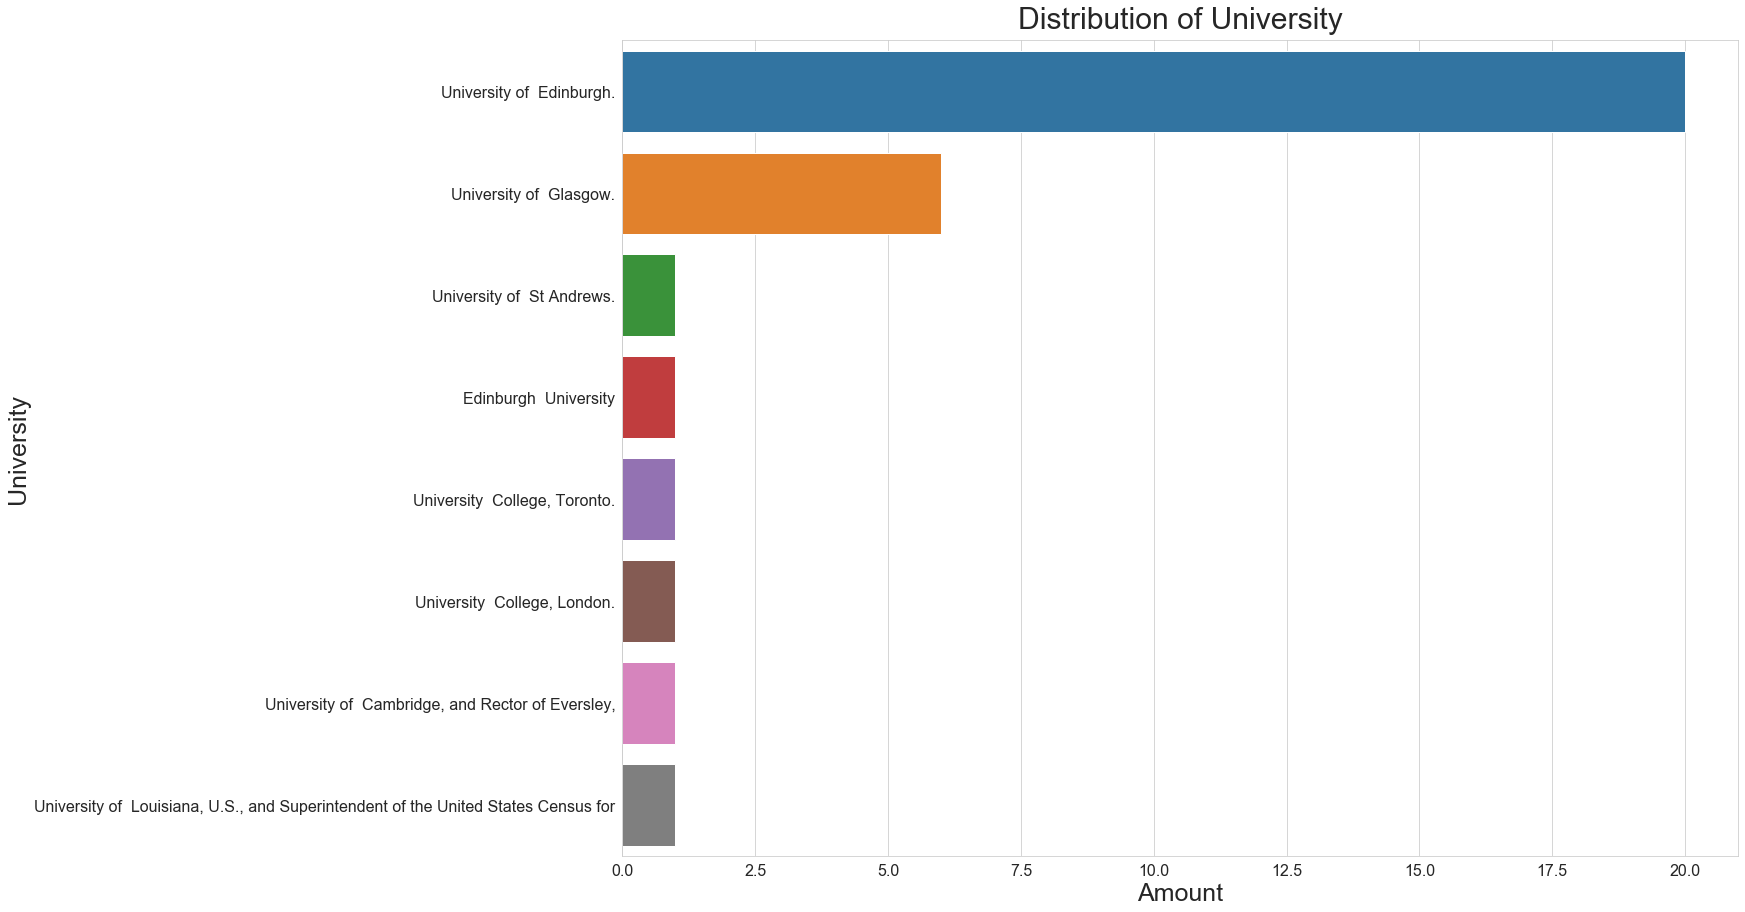

In [15]:
plt.figure(figsize=(20,15))
sns.set_style("whitegrid")
ax = sns.barplot(y='University', x='Amount', data=distribution_univ,ci=0, orient='h')
plt.title('Distribution of University',fontsize=30,verticalalignment='bottom')
plt.xticks(fontsize=16)
plt.xlabel('Amount', fontsize = 25)
plt.yticks(fontsize=16)
plt.ylabel('University', fontsize = 25)

From this graph, I found that the authors from the university of Edinburgh still the majority in Encyclopaedia authors  
***

This is used to match all professors with their research area.

In [16]:
field = []
professor_1 = []
counter = 0
for initial, authors in zip(List_of_Authors['Initial'],List_of_Authors['Authors']):
    result=re.findall(r"Professor of (.+?),", authors)
    if result != []:
        # If the author is professor
        for item in result:
            result_1 = re.findall(r"(.+?) in", item)
            if result_1 != [] :
                # Matching the research area in string 'in'
                for item_1 in result_1:
                    field.append(str(item_1))
                    professor_1.append(str(initial))
            else:
                field.append(str(item))
                professor_1.append(str(initial))
                
research_field = pd.DataFrame({'Initials':professor_1,'Fields':field})
distribution = research_field['Fields'].value_counts()
dict_field = {'Field':distribution.index,'Amount':distribution.values}
distribution_field = pd.DataFrame(dict_field)
distribution_field



Field  Amount
0                                           Chemistry       3
1                                  Natural Philosophy       3
2                                      Modern History       2
3                                   Political Economy       2
4                                               Logic       2
5                 the English Language and Literature       1
6                                      Materia Medica       1
7                   Moral and Metaphysical Philosophy       1
8                                      Church History       1
9                                  Geology and Botany       1
10  Church History to the Reformed Presbyterian Ch...       1
11                                          Sculpture       1
12                                           Humanity       1
13                                 English Literature       1
14                                  Civil Engineering       1
15                                           Divinity       1
16                                            Anatomy       1
17                              Logic and Metaphysics       1
18                                    Natural Science       1
19                     History and English Literature       1
20                                    Natural History       1
21                                          Midwifery       1
22                                 Veterinary Science       1

This is the list of research area distribution   
***

In [17]:
plt.figure(figsize=(20,15))
sns.set_style("whitegrid")
ax1 = sns.barplot(y='Field', x='Amount', data=distribution_field,ci=0, orient='h')
plt.title('Distribution of Research Area',fontsize=30,verticalalignment='bottom')
plt.xticks(fontsize=16)
plt.xlabel('Amount', fontsize = 25)
plt.yticks(fontsize=16)
plt.ylabel('Field', fontsize = 25)

Text(0, 0.5, 'Field')

## Reflection  

&emsp; In this assessment, the majority challenge I met is how to convert the original xml data to the more structured type (like data list or dataframe). The data for our group is Encyclopaedia. It is almost pure text and it haven't been cleaned yet. In assignment 2, the direction I chose is about the authors. At beginning, i planned to analyze the change of where authors come from. But I only found the authors list in 8th edition. I had to switch my goals to analyze the distribution of university where authors come from and the distributions of their research area. Meanwhile, I think i spent too much time on identify the words in XML and combine them into one item.  And because there are some wrong string in the xml file, I have to change some of their order and make some correction manually. I have no enough time to explore how to correct wrong string by python programming.

&emsp; In this assignment, I learnt how to deal with the pure text data. The Regular Expression is the most useful tool I learnt during the assignment. It could help me to match strings with specific conditions. However, I still confused about how to identify the research area from some authors which are the authors of other literature. In addition, I have deeper understanding about how to define functions by myself and use them. It makes code more structured and lightened workload of my computer and me.  

&emsp; During dealing with Encyclopaedia data, I begin to have interesting in NLP and if I have free time I plan to learn something about it and maybe apply it for assignment 3.


## Hypothesise
1. I suppose that the majority of authors should be from Scotland, especially Edinburgh at the early edition because the Encyclopedia Britannica is from Edinburgh at first. (From the authors list in 8th edition, The authors from the university of Edinburgh are still the majority) 
2. I suppose that the distribution of authors should from UK to worldwide. The amount of authors from other city, other country should be getting more and more. The reason is that, as an Encyclopedia, it should contain things from different culture. If the authors only come from UK, the content will be not accurate.
3. I assume that the research area of authors in the latest area should be wider than the early edition because with the development of society, there should be more and more knowledge be produced.

### Futher Study
&emsp; I have already ask data holder about are there any other lists of authors before 8th edition. If I can find them, i will analyse each edition to compare the distribution of authors and their research area. And I planed to draw it on a map to illustrate the change of geographic distribution.   

&emsp; If I cannot found more authors' list, I think I will change my goals to analyse how the knowledge change with the development of society. And the detailed direction will be decided after I clean the data
